<a href="https://colab.research.google.com/github/jka236/stockML/blob/main/stat302_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
install.packages("dplyr")
install.packages("tidyverse")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [181]:
library(tibble)
library(dplyr)
library(ggplot2)

3.4 Correlation tells you which relationship has a stronger relationship. The regression equation does not show the strength of the relationship. Thus, we can't conclude that the sugar & fiber has a weaker relationship from the given equation

3.13 
<br>a)
<br>arsenic = $\beta_0$ + $\beta_1$Year + $\beta_2$Miles + $\beta_3$MilesYear
<br>b)
<br>lead = $\beta_0$ + $\beta_1$Year + $\beta_2$(lclean = 1)
<br>lead = $\beta_0$ + $\beta_1$Year + $\beta_2$(lclean = 0)
<br>c)
<br>titanium = $\beta_0$ + $\beta_1$Miles + $\beta_2Miles^2$
<br>d)
<br>sulfide = $\beta_0$ + $\beta_1$Year + $\beta_2$Miles + $\beta_3$Depth + $\beta_4$YearMiles + $\beta_5$YearDepth + $\beta_6$MilesDepth

In [182]:
year = c(2001:2011)
fall = c(259,301,343,307,286,273,248,292,250,278,303)
spring =c(246,206,288,215,230,247,308,271,285,286,254)

In [183]:
mathEnrollments = tibble(year,fall,spring)
mathEnrollments = rows_delete(mathEnrollments, tibble(year=2003))

Matching, by = "year"



In [184]:
modelFit <- lm(spring~fall+year, data=mathEnrollments)

3.20 a) Regression Equation: Spring = -1.172e+04 -1.007e+00*Fall + 6.107e+00 * Year 

In [185]:
summary(modelFit)


Call:
lm(formula = spring ~ fall + year, data = mathEnrollments)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.1945  -9.3982   0.3212   5.8503  18.2036 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.172e+04  2.686e+03  -4.361  0.00331 **
fall        -1.007e+00  2.041e-01  -4.933  0.00169 **
year         6.107e+00  1.337e+00   4.566  0.00258 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.37 on 7 degrees of freedom
Multiple R-squared:  0.871,	Adjusted R-squared:  0.8342 
F-statistic: 23.64 on 2 and 7 DF,  p-value: 0.0007704


3.20 b) While "Residuals vs Years(Without year accounted)" shows the increasing residuals over time, "Residuals vs Years(With year accounted)" shows the heteroscedasticity(Cone-shaped). "Residuals vs Fitted Values" also shows the heteroscedasticity and it impiles the non-linearity. On the other hand, Normal Q-Q suggests the normality. In terms of Scale-Lcation plot, it clearly shows that the red line is not horizontal and it is cone-haped, which means that the assumption of equal variance is violated. Overall, although the slight problems with the residual plots from the simple linear model disappear, some assumptions are violated.

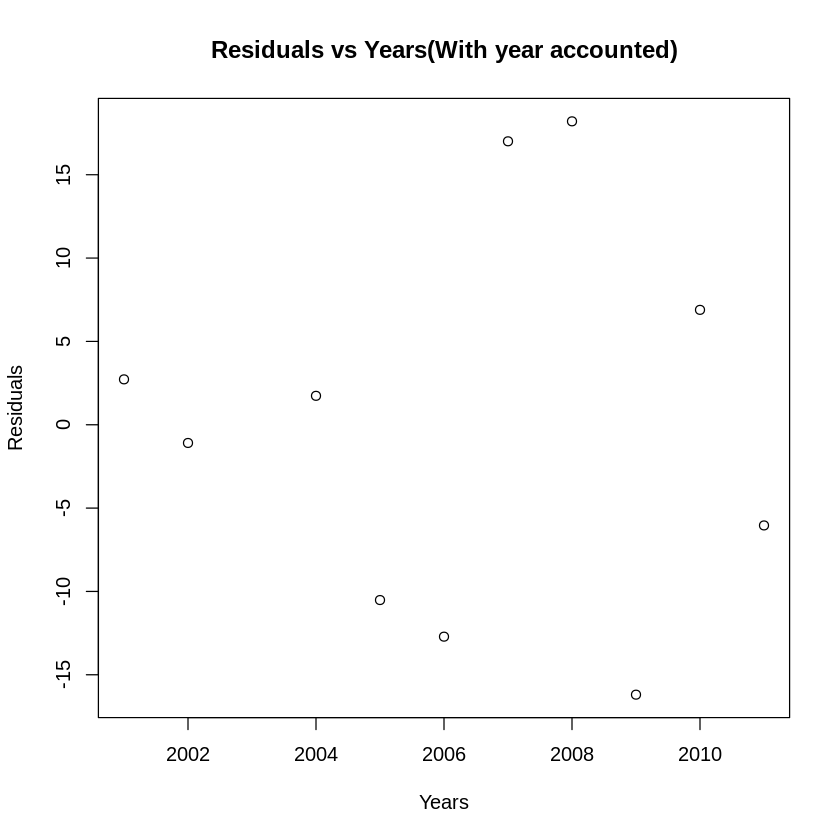

In [211]:
resid = resid(modelFit)
year = mathEnrollments$year
plot(year, resid, ylab="Residuals", xlab="Years", main="Residuals vs Years(With year accounted)")

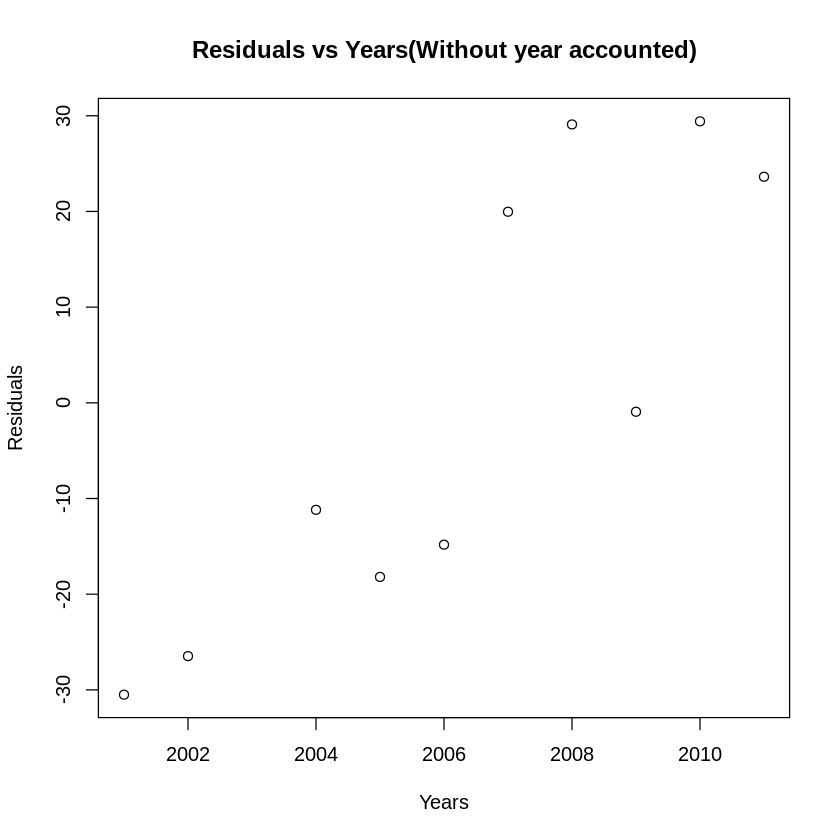

In [210]:
singleResid = resid(lm(spring~fall, data=mathEnrollments))
plot(year, singleResid, ylab="Residuals", xlab="Years", main="Residuals vs Years(Without year accounted)")

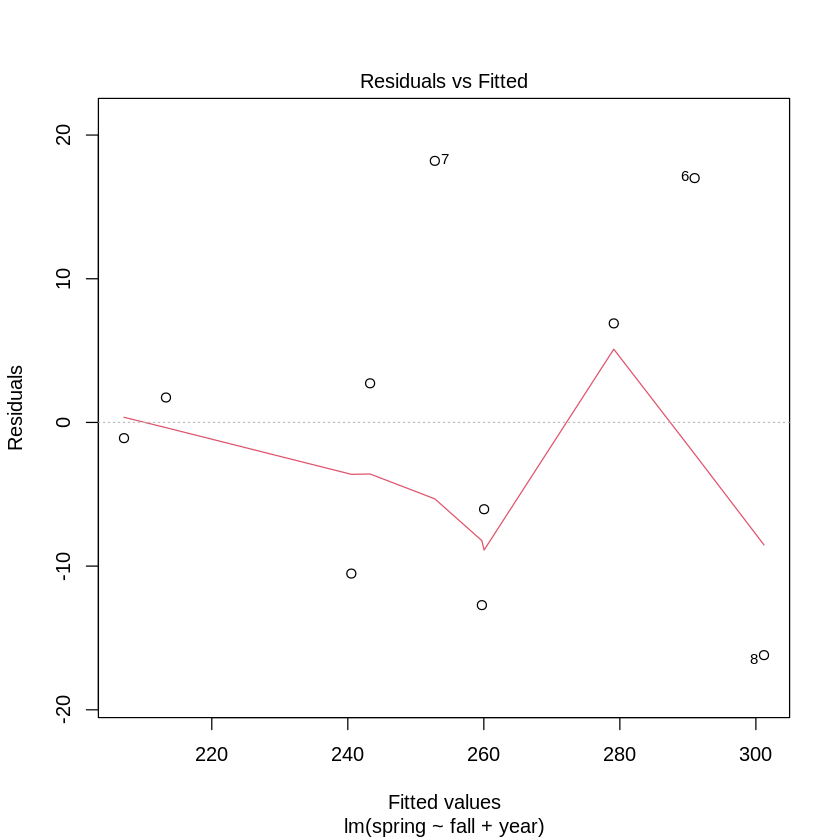

In [212]:
plot(modelFit, which=1)

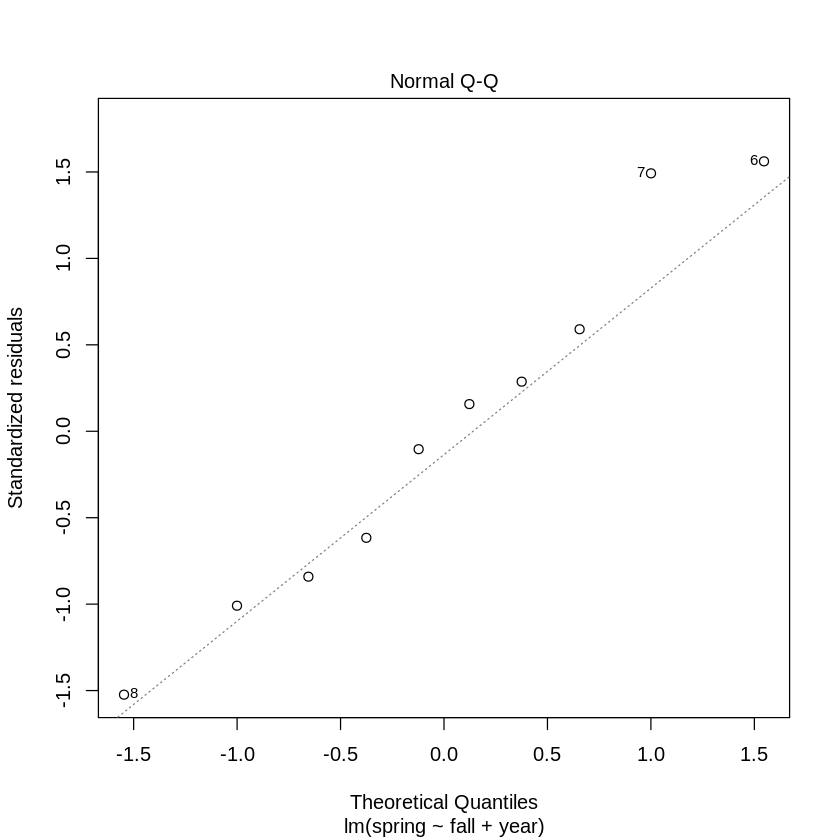

In [213]:
plot(modelFit, which=2)

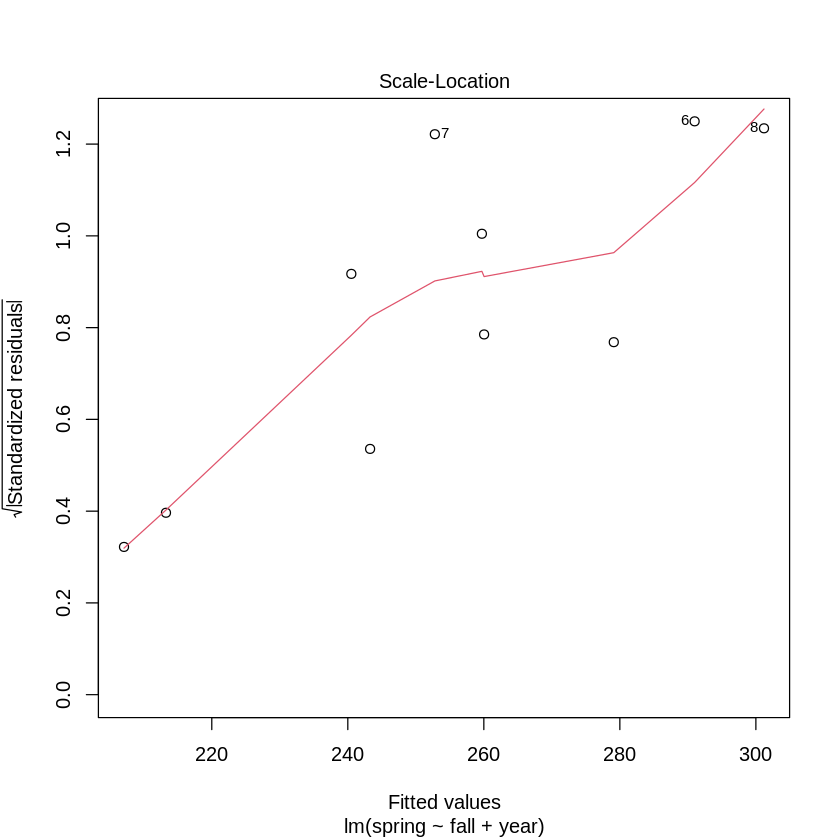

In [214]:
plot(modelFit, which=3)

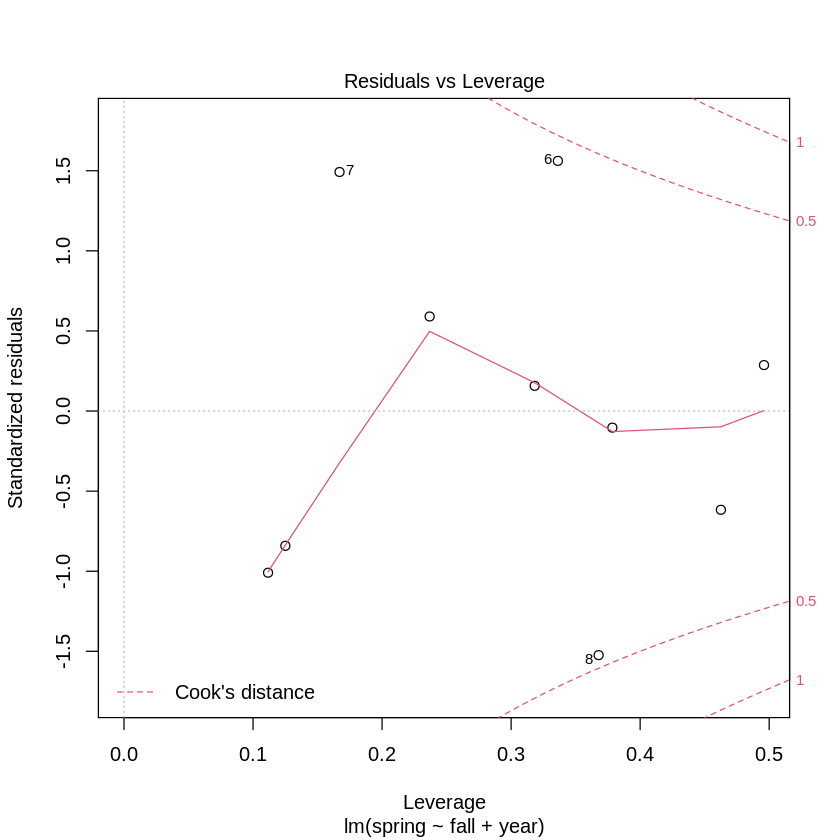

In [216]:
plot(modelFit, which=5)

In [188]:
fishEgg <- read.csv("FishEggs.csv")

3.34<br>a) PctDM = 38.70206 - 0.2103Age<br> As one year gets older, PctDM is expected to decrease by 0.2103

In [189]:
eggModelFit <- lm(PctDM~Age, data=fishEgg)

In [190]:
summary(eggModelFit)


Call:
lm(formula = PctDM ~ Age, data = fishEgg)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9091 -0.8471  0.3822  1.0271  2.1409 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.70206    0.86783  44.596   <2e-16 ***
Age         -0.21033    0.07313  -2.876    0.007 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.426 on 33 degrees of freedom
Multiple R-squared:  0.2004,	Adjusted R-squared:  0.1762 
F-statistic: 8.272 on 1 and 33 DF,  p-value: 0.007001


b) The Coefficient of Determination (R Squared) tells you the percentage of the variability explanined by the explanatory variable. The R-squared of the model is 0.2004. In other words, 20% of the variability in PctDM is explained by Age of the fish

c) The p-value is used to determine the relationship is statistically significant. The p-value for Age is 0.007. Assuming the level of significance to be 0.05, 0.07 is smaller than the level of significance. Thus, we can conclude that the relationship between PctDM and Age is statistically significant.

d) the plot does not have a regular pattern.

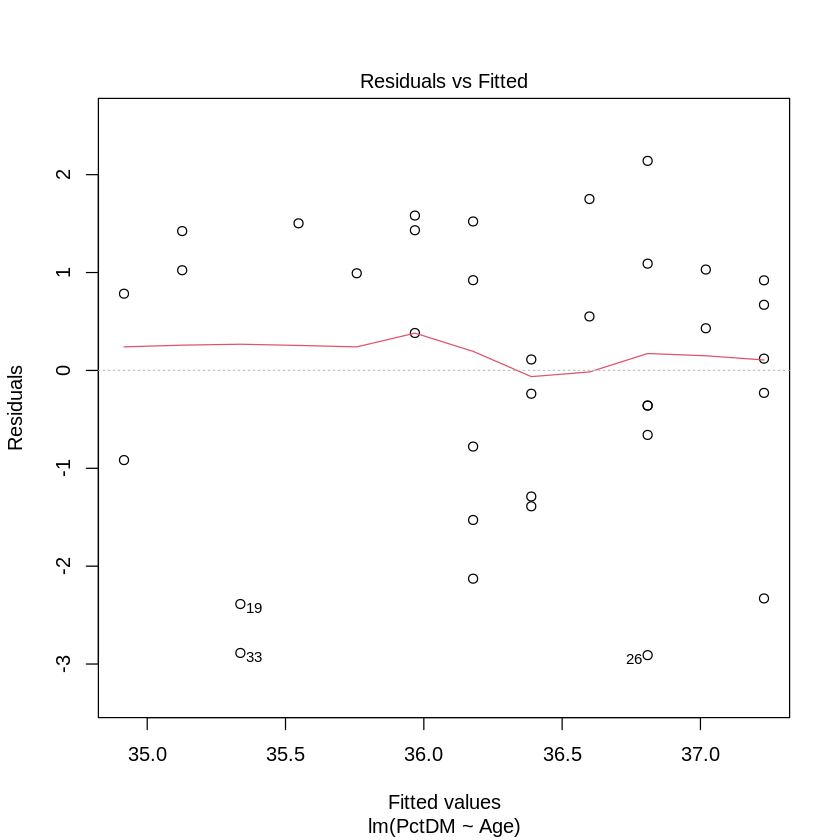

In [191]:
plot(eggModelFit, which=1)

e) The plot shows that residuals in september tend to be smaller


In [192]:
combinedData <- cbind(fishEgg, eggModelFit$residuals, eggModelFit$fitted.values)
colnames(combinedData)[5] <- "residuals"
colnames(combinedData)[6] <- "fitted.values"

`geom_smooth()` using formula 'y ~ x'



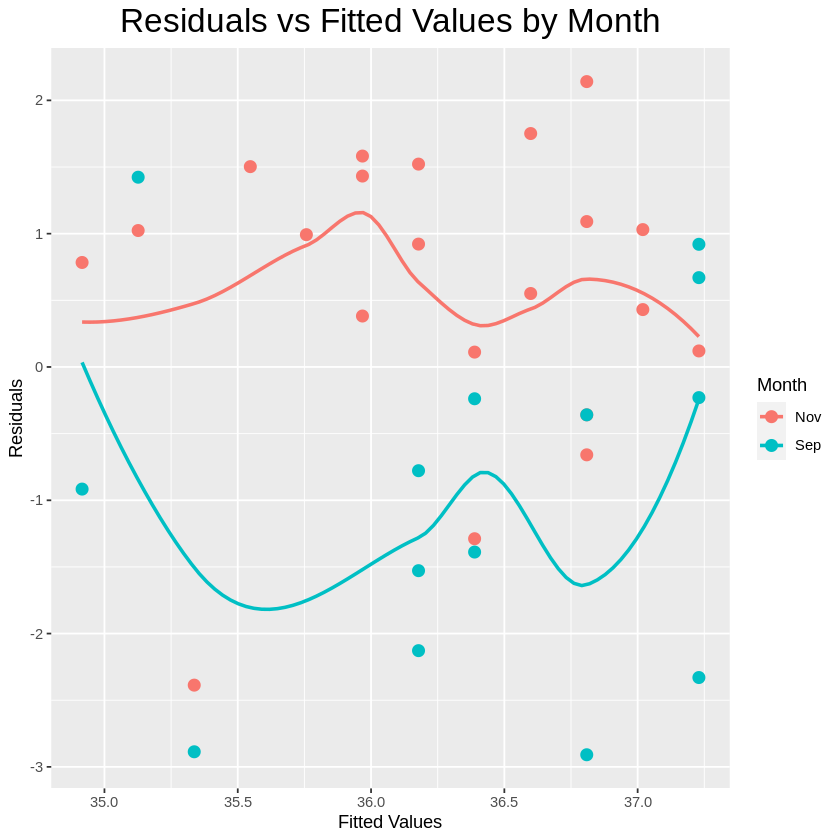

In [206]:
ggplot(data= combinedData, aes(x=fitted.values, y = residuals, color=Month)) + 
  geom_point(size=3) + 
  geom_smooth(method = "loess", se = FALSE) + 
  labs(title="Residuals vs Fitted Values by Month", x= "Fitted Values", y= "Residuals") +
  theme(plot.title = element_text(hjust = 0.5, size=20))

In [199]:
# 1. Indicator and Interaction Product(Month + Age*Month)
eggModelFitindcatorInteraction <- lm(PctDM~Age+Sept+Age*Sept, data=fishEgg)
summary(eggModelFitindcatorInteraction)


Call:
lm(formula = PctDM ~ Age + Sept + Age * Sept, data = fishEgg)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9559 -0.5576  0.2305  0.7522  2.5029 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.39733    1.07376  36.691   <2e-16 ***
Age         -0.21821    0.08942  -2.440   0.0206 *  
Sept        -1.27623    1.51190  -0.844   0.4051    
Age:Sept    -0.02144    0.12782  -0.168   0.8679    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.242 on 31 degrees of freedom
Multiple R-squared:  0.4303,	Adjusted R-squared:  0.3752 
F-statistic: 7.806 on 3 and 31 DF,  p-value: 0.000505


In [200]:
#  2. Indicator (Month)
eggModelFitInd <- lm(PctDM~Age+Sept, data=fishEgg)
summary(eggModelFitInd)


Call:
lm(formula = PctDM ~ Age + Sept, data = fishEgg)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9100 -0.5869  0.2974  0.7599  2.4380 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.51922    0.77827  50.778  < 2e-16 ***
Age         -0.22870    0.06292  -3.635 0.000965 ***
Sept        -1.51929    0.42342  -3.588 0.001096 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.223 on 32 degrees of freedom
Multiple R-squared:  0.4298,	Adjusted R-squared:  0.3942 
F-statistic: 12.06 on 2 and 32 DF,  p-value: 0.0001248


In [201]:
# 3. Interaction Product(Month*Age)
eggModelFitInt <- lm(PctDM~Age+Sept:Age, data=fishEgg)
summary(eggModelFitInt)


Call:
lm(formula = PctDM ~ Age + Sept:Age, data = fishEgg)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1421 -0.5796  0.2242  0.7175  2.7471 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.75361    0.75252  51.499  < 2e-16 ***
Age         -0.16634    0.06467  -2.572  0.01495 *  
Age:Sept    -0.12488    0.03619  -3.451  0.00159 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.237 on 32 degrees of freedom
Multiple R-squared:  0.4173,	Adjusted R-squared:  0.3808 
F-statistic: 11.46 on 2 and 32 DF,  p-value: 0.0001769


f) The model only with indicator and the model only with interaction product are statistically significant. 
<br> 1. Indicator and Interaction Product(Month + Age*Month) : P values for both the indicator and interaction product are higher than 0.05; thus, we don't need them
<br> 2. Indicator (Month): P value is lower than 0.05; thus, it is statistically significant
<br> 3. Interaction Product(Month*Age): P value is lower than 0.05; thus, it is statistically significant


In [202]:
eggModelFitInd <- lm(PctDM~Age+Sept, data=fishEgg)
eggModelFitInt <- lm(PctDM~Age+Sept:Age, data=fishEgg)

<br>g) The model only with indicator has a higher adjusted R-squared at 0.3942. 39% of the variability in PctDM is explained by age and month


In [203]:
summary(eggModelFitInd)


Call:
lm(formula = PctDM ~ Age + Sept, data = fishEgg)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9100 -0.5869  0.2974  0.7599  2.4380 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.51922    0.77827  50.778  < 2e-16 ***
Age         -0.22870    0.06292  -3.635 0.000965 ***
Sept        -1.51929    0.42342  -3.588 0.001096 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.223 on 32 degrees of freedom
Multiple R-squared:  0.4298,	Adjusted R-squared:  0.3942 
F-statistic: 12.06 on 2 and 32 DF,  p-value: 0.0001248


f) By taking account month values, the means of residuals of each month are the similiar value at 0 and the R-squared increased.  However, the linearity of the model didn't improve. 

`geom_smooth()` using formula 'y ~ x'



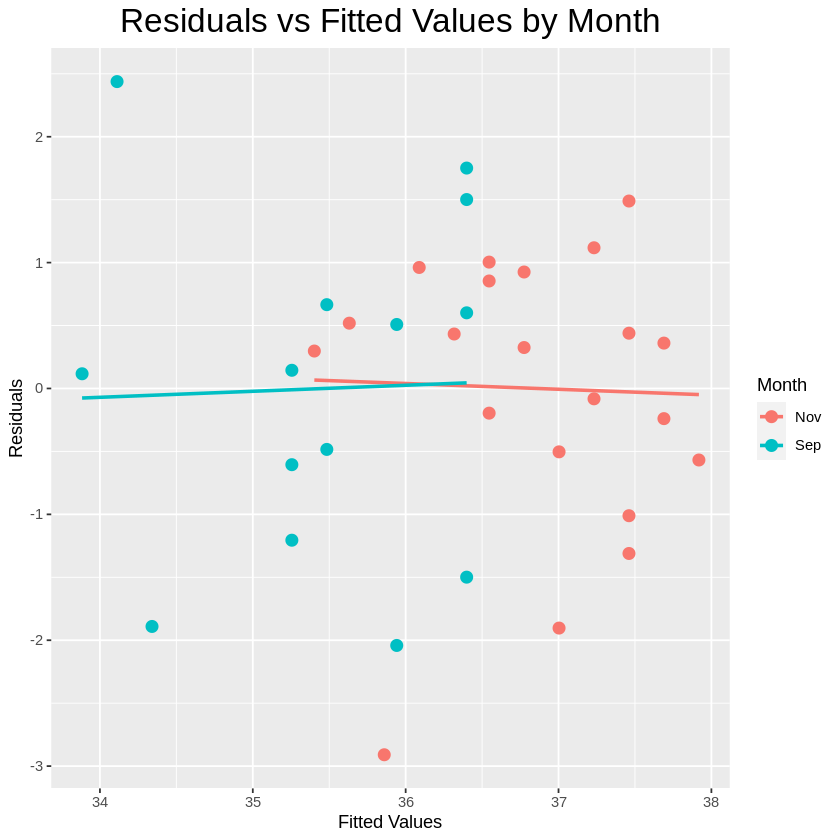

In [218]:
newCombinedData <- cbind(fishEgg, eggModelFitInd$residuals, eggModelFitInd$fitted.values)
colnames(newCombinedData)[5] <- "residuals"
colnames(newCombinedData)[6] <- "fitted.values"
ggplot(data= newCombinedData, aes(x=fitted.values, y = residuals, color=Month)) + 
  geom_point(size=3) + 
  geom_smooth(method = "lm", se = FALSE) + 
  labs(title="Residuals vs Fitted Values by Month", x= "Fitted Values", y= "Residuals") +
  theme(plot.title = element_text(hjust = 0.5, size=20))

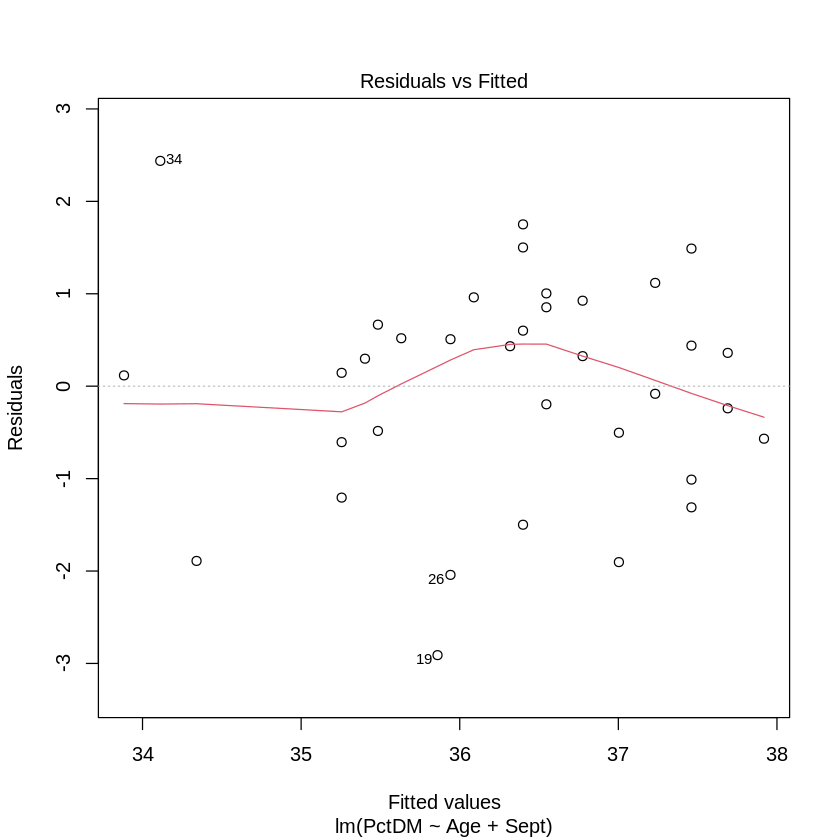

In [217]:
plot(eggModelFitInd,which=1)